# Using GMRES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import gmres

matsize = 100
identity_matrix = np.eye(matsize)
b = np.random.rand(matsize)

def gmres_res(A, b, maxiter, tol=1e-05, atol=None):
    """Returns the norm of the residual after each iteration."""
    residuals = []
    callback = lambda res: residuals.append(res)
    x, _ = gmres(A, b, maxiter=maxiter/20, tol=tol, atol=atol, callback=callback, callback_type="pr_norm")
    
    return residuals

r_size = gmres_res(identity_matrix, b, 100)

Text(0.5, 1.0, 'GMRES, Identity matrix')

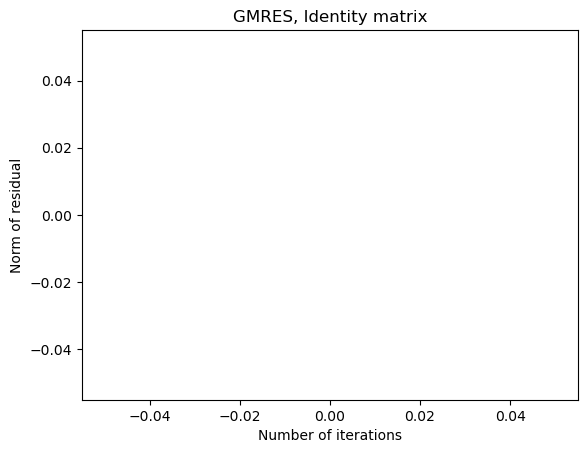

In [2]:
plt.plot(r_size)
# plt.yscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of residual")
plt.title("GMRES, Identity matrix")

# Experimenting with GMRES

In [3]:
a_matrix = np.random.randn(matsize, matsize) / np.sqrt(matsize)
b = np.random.rand(matsize)

r_size = gmres_res(a_matrix, b, 100, 1e-10, 1e-10)

Text(0.5, 1.0, 'GMRES, Rand matrix')

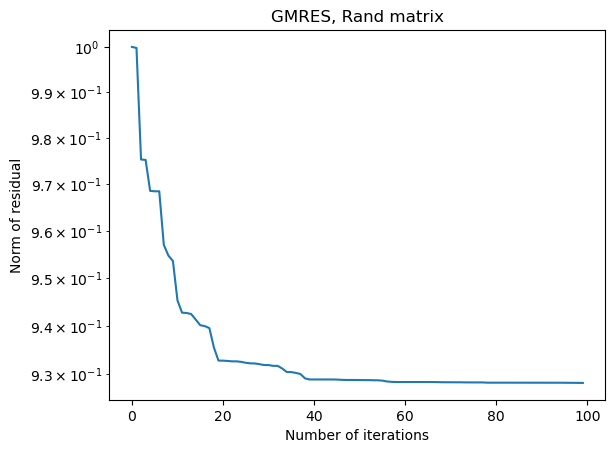

In [4]:
plt.plot(r_size)
plt.yscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of residual")
plt.title("GMRES, Rand matrix")

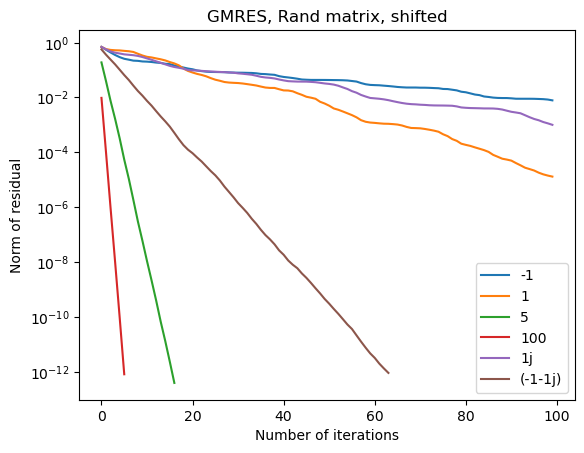

In [5]:
alphas = [-1, 1, 5, 100, 1j, -1-1j]

plt.yscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of residual")
plt.title("GMRES, Rand matrix, shifted")
for alpha in alphas:
    r_size = gmres_res(a_matrix + alpha*identity_matrix, b, 100, 1e-12, 1e-12)
    plt.plot(r_size)
plt.legend(alphas)

# Plotting eigenvalues

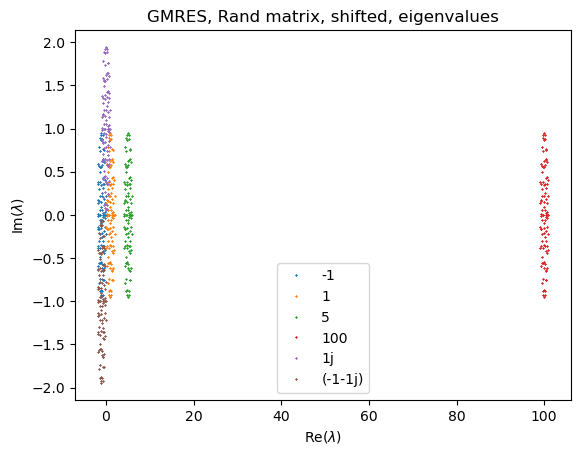

In [6]:
from scipy.linalg import eigvals

plt.xlabel("Re($\lambda$)")
plt.ylabel("Im($\lambda$)")
plt.title("GMRES, Rand matrix, shifted, eigenvalues")
for alpha in alphas:
    eigenvalues = eigvals(a_matrix + alpha*identity_matrix)
    plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'x', markersize=1)
plt.legend(alphas)

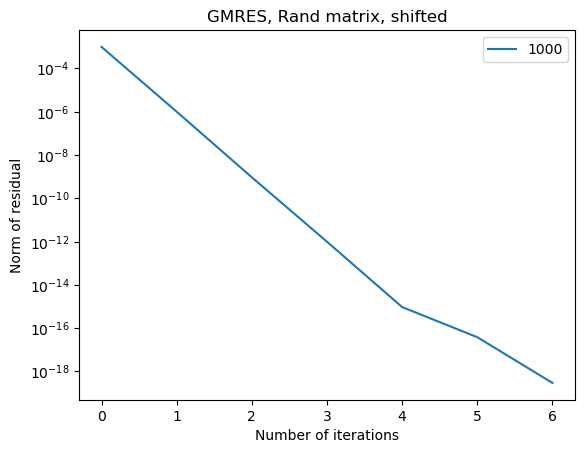

In [8]:
r_size = gmres_res(a_matrix + 1000*identity_matrix, b, 100, 1e-16, 1e-16)

plt.plot(r_size)
plt.yscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of residual")
plt.title("GMRES, Rand matrix, shifted")
plt.legend(["1000"])